In [72]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from matplotlib import pyplot
from random import randint

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before flattening for the next code-segment which displays images
x_train_drawing = x_train

image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)
    
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 784)
60000 train samples
10000 test samples


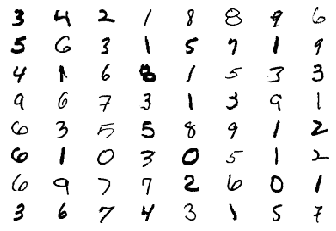

In [73]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

for i in range(64):
    ax = pyplot.subplot(8, 8, i+1)
    ax.axis('off')
    pyplot.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

In [74]:
def build_model(layers = 3, layer_sizes=[128] * 3, batch_size=128, epochs=10,
                activation_fn='sigmoid', optimiser_fn='sgd',
                add_dropout=False, dropout_p=0.2, l2_reg=0.0):
    model = Sequential()
    # range(a, b) is exclusive of b
    for l in range(0, layers):
        if (l == 0):
            model.add(Dense(layer_sizes[l], kernel_regularizer=l2(l2_reg), activation=activation_fn, input_shape=(image_size,)))
        else:
            model.add(Dense(layer_sizes[l], kernel_regularizer=l2(l2_reg), activation=activation_fn))
        if add_dropout:
            model.add(Dropout(dropout_p))

    model.add(Dense(units=num_classes, activation='softmax'))
    
    model.summary()
    model.compile(optimizer=optimiser_fn, loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs * layers,
                        verbose=False, validation_data=(x_test, y_test))
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    return history, loss, accuracy


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_266 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_267 (Dense)            (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_268 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_269 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_270 (Dense)            (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 

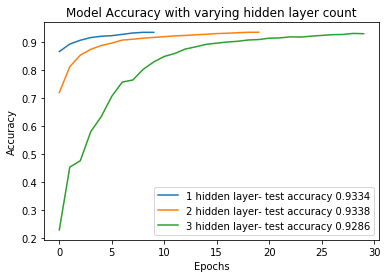

In [75]:
# Test Number of hidden layers
legend = []
pyplot.close()
for l in range(1, 4):
    history, loss, accuracy = build_model(l, [128] * l) 
    pyplot.plot(history.history['val_acc'])
    legend.append('{} hidden layer- test accuracy {}'.format(l, accuracy))

pyplot.title('Model Accuracy with varying hidden layer count')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend(legend, loc='best')
pyplot.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_275 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_276 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_277 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_278 (Dense)            (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Nodes 32 - test accuracy 0.8651
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_279 (Dense)            (None, 128)               100480    
________________________________________

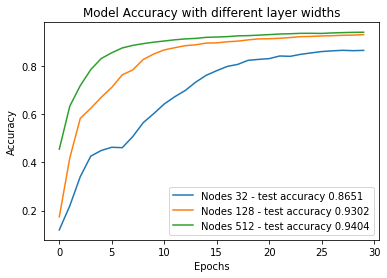

In [76]:
# Test different layer widths
legend.clear()
pyplot.close()
for nodes in [32, 128, 512]:
    history, loss, accuracy = build_model(3, [nodes] * 3) 
    pyplot.plot(history.history['val_acc'])
    legend.append('Nodes {} - test accuracy {}'.format(nodes, accuracy))
    print('Nodes {} - test accuracy {}'.format(nodes, accuracy))

    pyplot.title('Model Accuracy with different layer widths')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend(legend, loc='best')
pyplot.show()

In [ ]:
# Test different activation fn in hidden layer(s)
legend.clear()
pyplot.close()
for fn in ['relu', 'sigmoid', 'tanh']:
    history, loss, accuracy = build_model(activation_fn=fn) 
    pyplot.plot(history.history['val_acc'])
    legend.append('{} - test accuracy {}'.format(fn, accuracy))

pyplot.title('Model Accuracy with different ctivation fn in hidden layer(s)')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend(legend, loc='best')
pyplot.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_287 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_288 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_289 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_290 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_291 (Dense)            (None, 128)               100480    
_________________________________________________________________
dens

In [ ]:
# Test overfitting mitigating strategies
legend.clear()
pyplot.close()
history, loss, accuracy = build_model() 
pyplot.plot(history.history['val_loss'])
legend.append('No mitigating strategy - test accuracy {}'.format(accuracy))

history, loss, accuracy = build_model(l2_reg=0.0001) 
pyplot.plot(history.history['val_loss'])
legend.append('L2 Regularisation - test accuracy {}'.format(accuracy))

history, loss, accuracy = build_model(add_dropout=True) 
pyplot.plot(history.history['val_loss'])
legend.append('Dropout - test accuracy {}'.format(accuracy))

pyplot.title('Model loss with overfitting mitigating strategies')
pyplot.ylabel('Loss')
pyplot.xlabel('Epochs')
pyplot.legend(legend, loc='best')
pyplot.show()

In [ ]:
# Test different optimisation functions
legend.clear()
pyplot.close()
for fn in ['sgd', 'rmsprop', 'adam']:
    history, loss, accuracy = build_model(optimiser_fn=fn) 
    pyplot.plot(history.history['val_acc'])
    legend.append('{} - test accuracy {}'.format(fn, accuracy))

pyplot.title('Model Accuracy with different optimisers')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend(legend, loc='best')
pyplot.show()